In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
import os
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
datasetPath = '../../WinEarthPhotosByKeyword/'

In [3]:
#Constants
trueClasses = ['Moon']
falseClasses = ['Aurora','Cupola75Photos','Day','DockUndock','Night','Stars60Photos','Structure','SunriseSunset','Volcano20Photos']
imageX = 64
imageY = 64
scoring = ['accuracy','neg_log_loss','precision_macro', 'recall_macro']

In [4]:
tureImages = []
falseImages = []

for trueClass in trueClasses:
    tureImages = sum([tureImages,os.listdir(datasetPath + trueClass)],[])

for falseClass in falseClasses:
    falseImages = sum([falseImages,os.listdir(datasetPath + falseClass)],[])

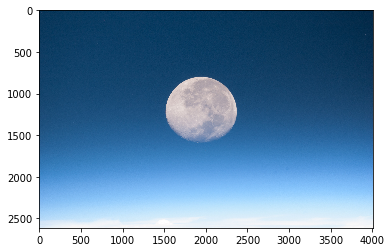

(2614, 4011, 3)
feature size: 31454262


In [5]:
img1 = mpimg.imread(datasetPath + trueClasses[0] +"/"+tureImages[0])
plt.imshow(img1)
plt.show()
print(img1.shape)
print('feature size: ' + str(img1.shape[0]*img1.shape[1] * img1.shape[2]))

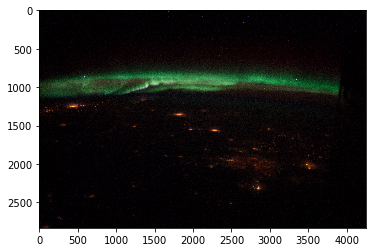

(2832, 4256, 3)
feature size: 36158976


In [6]:
img2 = mpimg.imread(datasetPath + falseClasses[0] +"/"+falseImages[0])
plt.imshow(img2)
plt.show()
print(img2.shape)
print('feature size: ' + str(img2.shape[0]*img2.shape[1] * img2.shape[2]))

In [7]:
def forceLandscape(image):
    if image.shape[0] > image.shape[1]:
        return np.rot90(image)
    return image

def resizeImage(image, x,y):
    return scipy.misc.imresize(image,(x,y), interp='nearest')

def grayscale(image):
    return np.dot(image[...,:3], [0.21, 0.72, 0.07])

def reshape(image):
    return image.flatten()

In [8]:
def formatImage(image):
    image = forceLandscape(image)
    image = resizeImage(image, imageX, imageY)
    image = grayscale(image)
    return image

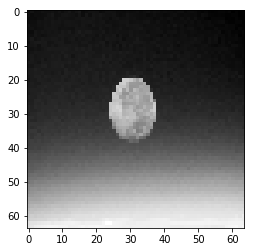

(64, 64)
feature size: 4096


In [9]:
formateImg1 = formatImage(img1)
plt.imshow(formateImg1, cmap='gray')
plt.show()
print(formateImg1.shape)
print('feature size: ' + str(formateImg1.shape[0]*formateImg1.shape[1]))

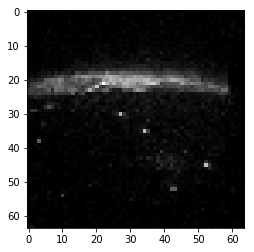

(64, 64)
feature size: 4096


In [10]:
formateImg2 = formatImage(img2)
plt.imshow(formateImg2, cmap='gray')
plt.show()
print(formateImg2.shape)
print('feature size: ' + str(formateImg2.shape[0]*formateImg2.shape[1]))

In [11]:
data = sum([tureImages, falseImages],[])
labels = []
maskedLabels = []
for trueClass in trueClasses:
    newLabels = [trueClass] * len(os.listdir(datasetPath + trueClass))
    labels = sum([labels , newLabels], [])
    newLabels = [trueClass] * len(os.listdir(datasetPath + trueClass))
    maskedLabels = sum([maskedLabels , newLabels], [])

for falseClass in falseClasses:
    newLabels = [falseClass] * len(os.listdir(datasetPath + falseClass))
    labels = sum([labels , newLabels], [])
    newLabels = ['False'] * len(os.listdir(datasetPath + falseClass))
    maskedLabels = sum([maskedLabels , newLabels], [])

In [12]:
#loading should take long
images = []
for i in range(0, len(data)):
    imagePath = datasetPath + labels[i] + "/" +  data[i]
    img = mpimg.imread(imagePath)
    img = formatImage(img)
    img = reshape(img)
    images.append(img)
    
print("loading complete")

loading complete


In [13]:
names = ["Nearest Neighbors", 
         #"Linear SVM", 
         #"RBF SVM", 
         #"Gaussian Process",
         "Decision Tree", 
         "Random Forest", 
         "Neural Net", 
         "AdaBoost",
         "Naive Bayes",
         "SVM",
         #"QDA"
        ]

classifiers = [
    KNeighborsClassifier(3),
    #SVC(kernel="linear", C=0.025, probability=True),
    #SVC(gamma=2, C=1, probability=True),
    #GaussianProcessClassifier(1.0 * RBF(1.0)), #This took forever and only returned 12%
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(probability=True)
    #QuadraticDiscriminantAnalysis() # Did not converage
]

In [14]:
for name, clf in zip(names, classifiers):
    print(name)
    scores = cross_validate(clf, images, maskedLabels, scoring=scoring, cv=5)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
    print("Log Loss: %0.2f (+/- %0.2f)" % (scores['test_neg_log_loss'].mean(), scores['test_neg_log_loss'].std() * 2))
    print("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
    print("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))
    print("-------------")

Nearest Neighbors
Accuracy: 0.84 (+/- 0.06)
Log Loss: -2.05 (+/- 0.57)
Precision: 0.67 (+/- 0.08)
Recall: 0.75 (+/- 0.13)
-------------
Decision Tree
Accuracy: 0.88 (+/- 0.06)
Log Loss: -1.52 (+/- 1.04)
Precision: 0.70 (+/- 0.30)
Recall: 0.62 (+/- 0.17)
-------------
Random Forest


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.89 (+/- 0.03)
Log Loss: -0.30 (+/- 0.06)
Precision: 0.73 (+/- 0.39)
Recall: 0.54 (+/- 0.07)
-------------
Neural Net
Accuracy: 0.74 (+/- 0.61)
Log Loss: -2.04 (+/- 2.46)
Precision: 0.72 (+/- 0.20)
Recall: 0.67 (+/- 0.17)
-------------
AdaBoost
Accuracy: 0.89 (+/- 0.06)
Log Loss: -0.62 (+/- 0.01)
Precision: 0.75 (+/- 0.19)
Recall: 0.70 (+/- 0.09)
-------------
Naive Bayes
Accuracy: 0.61 (+/- 0.34)
Log Loss: -13.20 (+/- 11.53)
Precision: 0.62 (+/- 0.18)
Recall: 0.73 (+/- 0.24)
-------------
SVM


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 

Accuracy: 0.88 (+/- 0.00)
Log Loss: -0.37 (+/- 0.03)
Precision: 0.44 (+/- 0.00)
Recall: 0.50 (+/- 0.00)
-------------
